<a href="https://colab.research.google.com/github/shqmffl486/Deep-Learning/blob/main/2_CNN_Classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


# 유틸

In [ ]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

from keras.models import model_from_json
from typing import Optional

In [ ]:

def load_model(
    model_name: str, with_weights_path: Optional[str] = None
) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [ ]:
# 구글 드라이브 import
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

import os
gdrive_path = os.path.join("/gdrive", "My Drive", "test", "test1", "resources")

Mounted at /gdrive


# CNN Classification

## Fashion MNIST

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0               


train_labels[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

## 모델 1


### 모델 1 생성

In [ ]:

def cnn_classification_model():
  input = keras.layers.Input((28, 28, 1))

  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(input)
  conv_1 = keras.layers.Conv2D(6, 3, activation='relu', padding='same')(conv_1)
  pool_1 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_1)

  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(pool_1)
  conv_3 = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(conv_3)
  pool_2 = keras.layers.MaxPooling2D((2, 2), strides=2)(conv_3)

  flatten = keras.layers.Flatten()(pool_2)
  dense_1 = keras.layers.Dense(120)(flatten)
  dense_2 = keras.layers.Dense(84)(dense_1)
  dense_3 = keras.layers.Dense(10, activation='softmax')(dense_2)

  return keras.models.Model(inputs=[input], outputs=[dense_3])

In [ ]:
model = cnn_classification_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 6)         330       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        880       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0   

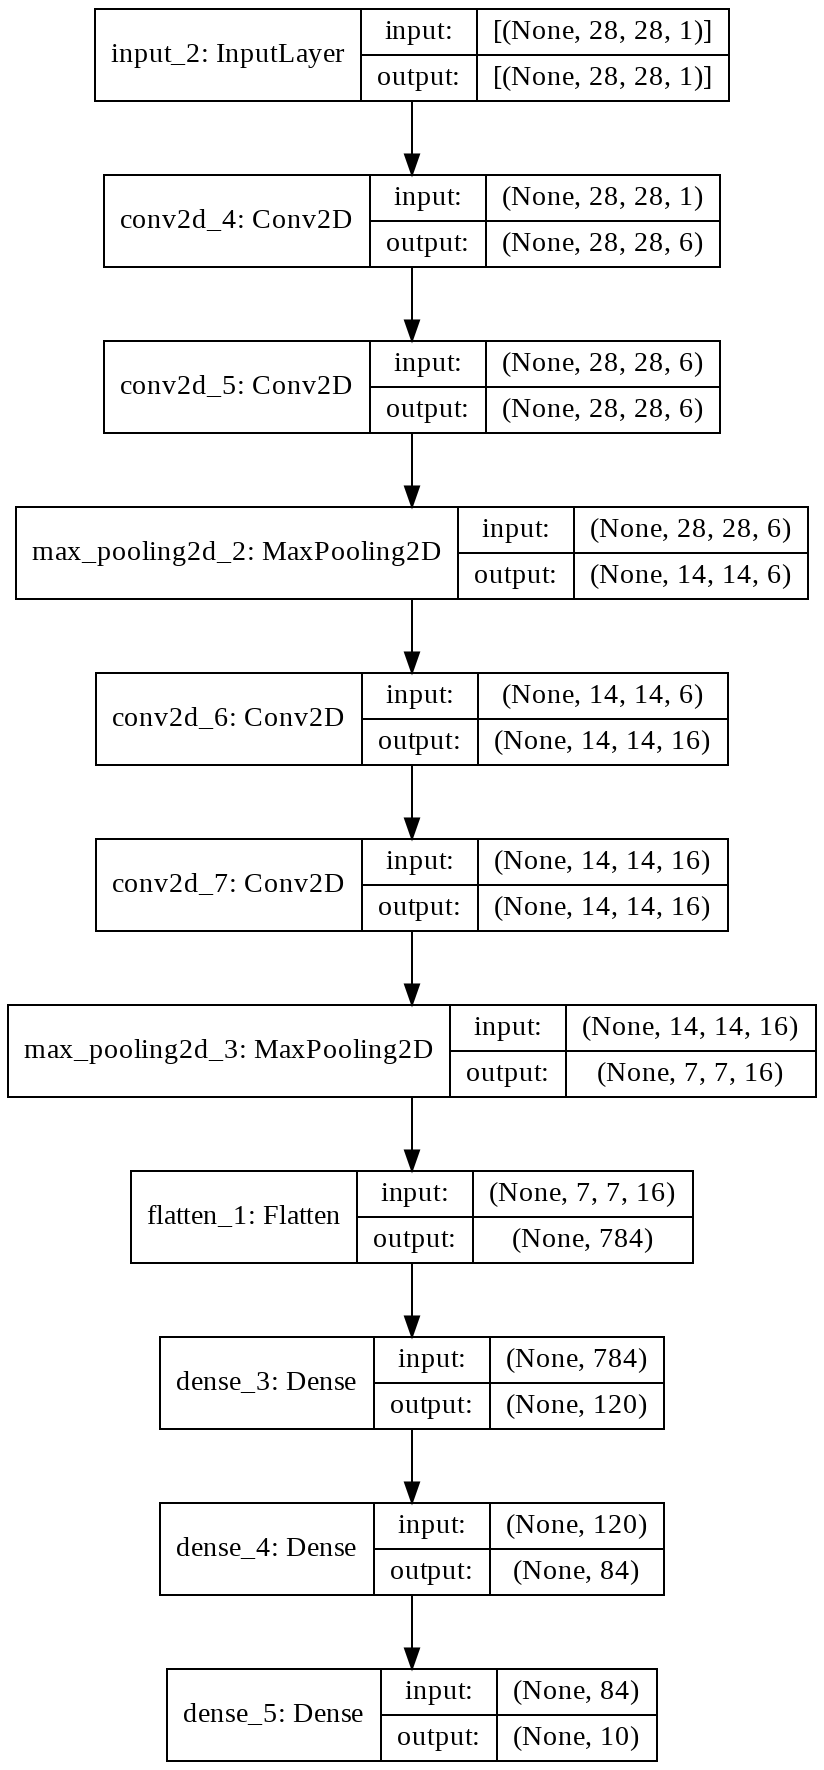

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png', expand_nested=True, dpi=144)

### 모델 1 트레이닝

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
num_train_examples = len(train_images)

import math

history = model.fit(train_images, train_labels, epochs=10, batch_size=BATCH_SIZE, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.6301 - accuracy: 0.7675
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.3159 - accuracy: 0.8851
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2667 - accuracy: 0.9039
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2427 - accuracy: 0.9115
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2326 - accuracy: 0.9154
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2195 - accuracy: 0.9195
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2070 - accuracy: 0.9239
Epoch 8/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2049 - accuracy: 0.9253
Epoch 9/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1990 - accuracy: 0.9260
Epoch 10/10
1875/1875 [==============================] - 60s 32m

[0.8363000154495239,
 0.8894166946411133,
 0.9043999910354614,
 0.9100499749183655,
 0.9154333472251892,
 0.9187666773796082,
 0.922249972820282,
 0.9243500232696533,
 0.925849974155426,
 0.9281166791915894]

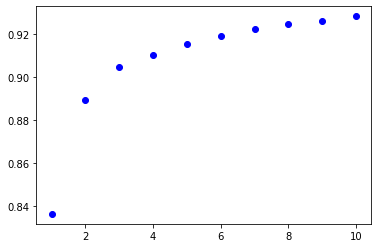

In [ ]:
history_accuracy = history.history["accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.45073941349983215,
 0.30419474840164185,
 0.2671859562397003,
 0.24843475222587585,
 0.2335391342639923,
 0.22393038868904114,
 0.21411214768886566,
 0.20730207860469818,
 0.20188547670841217,
 0.19551390409469604]

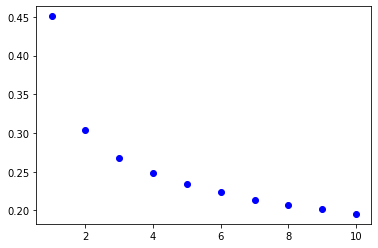

In [ ]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 1 테스트 및 예측

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 4s - loss: 0.2670 - accuracy: 0.9084
테스트 정확도: 0.9083999991416931


In [ ]:
save_model(os.path.join(gdrive_path, "cnn_classification_model_000.json"), model)

import time
run_id: str = time.strftime("%Y%m%d-%H%M%S")
model.save_weights(os.path.join(gdrive_path, "cnn_classification_model_000__{}.hdf5".format(run_id)))

In [ ]:
json_model_path = os.path.join(gdrive_path, "cnn_classification_model_000.json")
model_weight_path = os.path.join(gdrive_path, "cnn_classification_model_000__20210203-033106.hdf5")
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

예측: 9
[7.7947299e-10 2.7927687e-09 3.0694672e-10 4.0159777e-12 1.8858920e-11
 4.7725180e-06 5.6024702e-10 2.5517156e-04 6.3191347e-10 9.9974006e-01]
정답 :9
